<a href="https://colab.research.google.com/github/AMROAMRO404/ML-Sentiment-Analysis-IMDB/blob/main/reviews_anaylsis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Description**

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount("/content/gdrive")


# Load dataset
df = pd.read_csv("/content/gdrive/MyDrive/IMDB_Dataset.csv",engine='python',error_bad_lines=False)

# Display dimensions of dataframe
print(df.shape)
print(df.info())

print("_______________________________________________________________________")
# Display first 10 records
print(df.head(10))

print("_______________________________________________________________________")
# Display last 10 records
print(df.tail(10))

print("_______________________________________________________________________")
# List types of all columns
print(df.dtypes)

print("_______________________________________________________________________")
# List the column names
print(df.columns)


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
(50000, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None
_______________________________________________________________________
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
5  Probably my all-time favorite movie, a story o...  positive
6  I sure would like to see a resu

SUM : 
 review       0
sentiment    0
dtype: int64


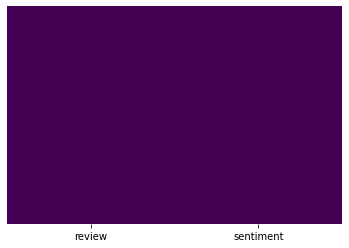

In [ ]:
import seaborn as sns 
# Is there any missing values ?
print("SUM : \n",df.isnull().sum())
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap="viridis")

In [ ]:
# Dropping the duplicate rows
duplicate_rows = df[df.duplicated()]
print("number of duplicate rows : ",duplicate_rows.shape)

df.drop_duplicates(inplace=True)
print("number of duplicate rows : ",df[df.duplicated()].shape)

number of duplicate rows :  (418, 2)
number of duplicate rows :  (0, 2)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


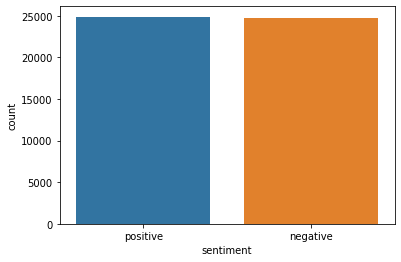

In [ ]:
# data visualization
sns.countplot(df['sentiment'])

In [ ]:
# Mapping of label values
df_copy = df.copy()
print(df.head(10))

print("_______________________________________________________________________")
df_copy["sentiment"] = df_copy["sentiment"].map({"negative":0,"positive":1})
print("Sentiment :\n",df_copy.head(20))

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
5  Probably my all-time favorite movie, a story o...  positive
6  I sure would like to see a resurrection of a u...  positive
7  This show was an amazing, fresh & innovative i...  negative
8  Encouraged by the positive comments about this...  negative
9  If you like original gut wrenching laughter yo...  positive
_______________________________________________________________________
Sentiment :
                                                review  sentiment
0   One of the other reviewers has mentioned that ...          1
1   A wonderful little production. <br /><br />The...          1
2   I thought this was a wo

## **Text preprocessing**

### **Remove panctuation**

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
print("data before ... ")
print(df_copy.head(10))
print("_______________________________________________________________________")

def remove_punctuation(text):
    text_nopunc = "".join([char for char in text if char not in string.punctuation]) # delete all punctuation
    return text_nopunc
df_copy['review_pun'] = df_copy['review'].apply(lambda x: remove_punctuation(x))
# Display first 10 records after remove punctuation 

print("data after ... ")
print(df_copy.head(10))
print("_______________________________________________________________________")

data before ... 
                                              review  sentiment
0  One of the other reviewers has mentioned that ...          1
1  A wonderful little production. <br /><br />The...          1
2  I thought this was a wonderful way to spend ti...          1
3  Basically there's a family where a little boy ...          0
4  Petter Mattei's "Love in the Time of Money" is...          1
5  Probably my all-time favorite movie, a story o...          1
6  I sure would like to see a resurrection of a u...          1
7  This show was an amazing, fresh & innovative i...          0
8  Encouraged by the positive comments about this...          0
9  If you like original gut wrenching laughter yo...          1
_______________________________________________________________________
data after ... 
                                              review  ...                                         review_pun
0  One of the other reviewers has mentioned that ...  ...  One of the other review

### **Tokenization**

In [ ]:
import re

# Function to Tokenize words
def tokenize(text):
    tokens = re.split('\W+', text) #W+ means that either a word character (A-Za-z0-9_) or a dash (-) can go there.
    return tokens

df_copy['review_tokenized'] = df_copy['review_pun'].apply(lambda x: tokenize(x.lower())) 
#We convert to lower as Python is case-sensitive. 

df_copy.head()

,review,sentiment,review_pun,review_tokenized
0,One of the other reviewers has mentioned that ...,1,One of the other reviewers has mentioned that ...,"[one, of, the, other, reviewers, has, mentione..."
1,A wonderful little production. <br /><br />The...,1,A wonderful little production br br The filmin...,"[a, wonderful, little, production, br, br, the..."
2,I thought this was a wonderful way to spend ti...,1,I thought this was a wonderful way to spend ti...,"[i, thought, this, was, a, wonderful, way, to,..."
3,Basically there's a family where a little boy ...,0,Basically theres a family where a little boy J...,"[basically, theres, a, family, where, a, littl..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,Petter Matteis Love in the Time of Money is a ...,"[petter, matteis, love, in, the, time, of, mon..."


### **Remove stopwords**

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print(stop_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'bo

In [ ]:
print("data before ... ")
print(df_copy.head(10))
print("_______________________________________________________________________")

def remove_stopwords(text):
    text = [word for word in text if word not in stop_words]
    return text

df_copy['review_stopword'] = df_copy['review_tokenized'].apply(lambda x: remove_stopwords(x))

print("data after ... ")
print(df_copy.head(10))
print("_______________________________________________________________________")

data before ... 
                                              review  ...                                   review_tokenized
0  One of the other reviewers has mentioned that ...  ...  [one, of, the, other, reviewers, has, mentione...
1  A wonderful little production. <br /><br />The...  ...  [a, wonderful, little, production, br, br, the...
2  I thought this was a wonderful way to spend ti...  ...  [i, thought, this, was, a, wonderful, way, to,...
3  Basically there's a family where a little boy ...  ...  [basically, theres, a, family, where, a, littl...
4  Petter Mattei's "Love in the Time of Money" is...  ...  [petter, matteis, love, in, the, time, of, mon...
5  Probably my all-time favorite movie, a story o...  ...  [probably, my, alltime, favorite, movie, a, st...
6  I sure would like to see a resurrection of a u...  ...  [i, sure, would, like, to, see, a, resurrectio...
7  This show was an amazing, fresh & innovative i...  ...  [this, show, was, an, amazing, fresh, innovati...
8 

### **Lemetizing**

In [ ]:
nltk.download('wordnet')
print("data before ... ")
print(df_copy.head(10))
print("_______________________________________________________________________")
wn = nltk.WordNetLemmatizer()

def lemetizing(text):
    text = [wn.lemmatize(word) for word in text]
    return text
df_copy['review_lem'] = df_copy['review_stopword'].apply(lambda x: lemetizing(x))

print("data after ... ")
print(df_copy.head(10))
print("_______________________________________________________________________")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
data before ... 
                                              review  ...                                    review_stopword
0  One of the other reviewers has mentioned that ...  ...  [one, reviewers, mentioned, watching, 1, oz, e...
1  A wonderful little production. <br /><br />The...  ...  [wonderful, little, production, br, br, filmin...
2  I thought this was a wonderful way to spend ti...  ...  [thought, wonderful, way, spend, time, hot, su...
3  Basically there's a family where a little boy ...  ...  [basically, theres, family, little, boy, jake,...
4  Petter Mattei's "Love in the Time of Money" is...  ...  [petter, matteis, love, time, money, visually,...
5  Probably my all-time favorite movie, a story o...  ...  [probably, alltime, favorite, movie, story, se...
6  I sure would like to see a resurrection of a u...  ...  [sure, would, like, see, resurrection, dated, 

In [ ]:
# Reconstruct the text
print("data before ... ")
print(df_copy.head(10))
print("_______________________________________________________________________")

def construct(text):
  text_clean = ""
  for word in text:
    text_clean += word +" "
  return text_clean
    
df_copy['review_cleaned'] = df_copy['review_lem'].apply(lambda x: construct(x))

print("data after ... ")
print(df_copy.head(10))
print("_______________________________________________________________________")

data before ... 
                                              review  ...                                         review_lem
0  One of the other reviewers has mentioned that ...  ...  [one, reviewer, mentioned, watching, 1, oz, ep...
1  A wonderful little production. <br /><br />The...  ...  [wonderful, little, production, br, br, filmin...
2  I thought this was a wonderful way to spend ti...  ...  [thought, wonderful, way, spend, time, hot, su...
3  Basically there's a family where a little boy ...  ...  [basically, there, family, little, boy, jake, ...
4  Petter Mattei's "Love in the Time of Money" is...  ...  [petter, matteis, love, time, money, visually,...
5  Probably my all-time favorite movie, a story o...  ...  [probably, alltime, favorite, movie, story, se...
6  I sure would like to see a resurrection of a u...  ...  [sure, would, like, see, resurrection, dated, ...
7  This show was an amazing, fresh & innovative i...  ...  [show, amazing, fresh, innovative, idea, 70, f...
8 

# **Models Implementation**

In [ ]:
# import libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [ ]:
y = df_copy["sentiment"].values
# split the dataset into training data and test data
X_train, X_test, y_train, y_test = train_test_split(df_copy, y, 
                        test_size= 0.20, random_state=100, stratify=y)

vec = TfidfVectorizer()
train_vectors = vec.fit_transform(X_train['review'])
test_vectors = vec.transform(X_test['review'])

print("train data : ", train_vectors.shape)
print("test data : ", test_vectors.shape)

train data :  (39665, 93100)
test data :  (9917, 93100)


Classification report : 
 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True) 
               precision    recall  f1-score   support

           0       0.85      0.88      0.87      4940
           1       0.88      0.84      0.86      4977

    accuracy                           0.86      9917
   macro avg       0.86      0.86      0.86      9917
weighted avg       0.87      0.86      0.86      9917

Confusion matrix: 
 [[4370  570]
 [ 775 4202]]


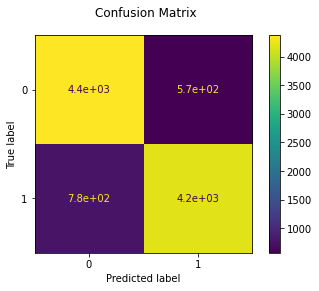

In [ ]:
# Classify using Naive Bayes 0.86

MNB_clf = MultinomialNB()

# fit model no training data
MNB_clf.fit(train_vectors, Y_train)

# making predictions on the testing set 
predicted = MNB_clf.predict(test_vectors)

# Classification report
print("Classification report : \n", MNB_clf,"\n", 
      metrics.classification_report(Y_test, predicted))
disp = metrics.plot_confusion_matrix(MNB_clf, test_vectors, Y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix: \n", disp.confusion_matrix)

Classifier :  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Classification report for classifier : 
               precision    recall  f1-score   support

           0       0.91      0.89      0.90      4940
           1       0.89      0.91      0.90      4977

    accuracy                           0.90      9917
   macro avg       0.90      0.90      0.90      9917
weighted avg       0.90      0.90      0.90      9917

Confusion matrix: 
 [[4392  548]
 [ 437 4540]]


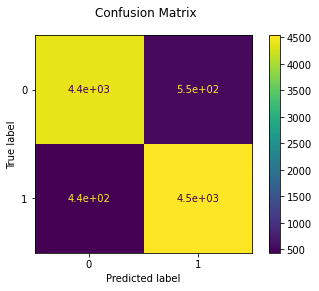

In [ ]:
from sklearn.linear_model import LogisticRegression

# Create the classifier
# multi_class: default = "auto"
logreg = LogisticRegression(random_state=42)

# Train the classifier
logreg.fit(train_vectors, y_train)

# Predict the value of X_test
predicted = logreg.predict(test_vectors)

# Classification report
print("Classifier : ", logreg)
print("Classification report for classifier : \n", metrics.classification_report(y_test, predicted))

disp = metrics.plot_confusion_matrix(logreg, test_vectors, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix: \n", disp.confusion_matrix)

# **Validation**

In [ ]:
# Cross-validation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [ ]:
print("\n Stratified K-fold Cross-Validation : *********")
from sklearn.model_selection import StratifiedKFold
skfold = StratifiedKFold(n_splits=10, random_state=100)
model = logreg
results_model = cross_val_score(model, train_vectors, y_train, cv=skfold)
print("Scores    :", results_model)
print("Accuracy  :", results_model.mean())


 Stratified K-fold Cross-Validation : *********


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the n

Scores    : [0.89337031 0.8946307  0.89942022 0.89689942 0.89110159 0.89384771
 0.89233485 0.89460414 0.89687342 0.89006556]
Accuracy  : 0.8943147901605288


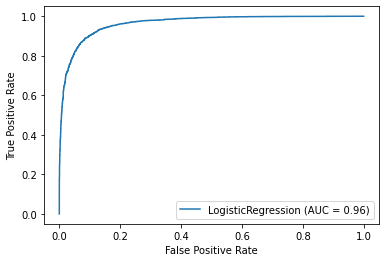

In [ ]:
# AUC-ROC curve (an evaluation metric for binary classification problems)
"""
AUC : The Area Under the Curve 
ROC : Receiver Characteristic Operator

AUC measures the entire two-dimensional area underneath the entire ROC curve 
(think integral calculus) from (0,0) to (1,1).

When AUC = 1, then the classifier is able to perfectly distinguish between all 
the Positive and the Negative class points correctly. If, however, the AUC had been 0, 
then the classifier would be predicting all Negatives as Positives, and all Positives as Negatives
"""
from sklearn import metrics
disp = metrics.plot_roc_curve(logisticRegr, test_vectors, y_test)

Text(0.5, 1.0, '2-class Precision-Recall curve: ')

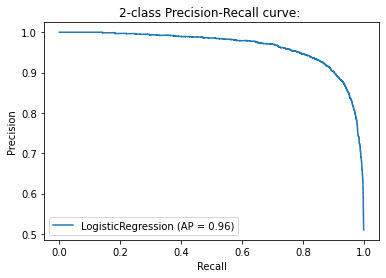

In [ ]:
"""
A system with high recall but low precision returns many results, 
but most of its predicted labels are incorrect when compared to the training labels.

A system with high precision but low recall is just the opposite, 
returning very few results, but most of its predicted labels are correct when 
compared to the training labels. 

An ideal system with high precision and high recall will return many results, 
with all results labeled correctly.

AP : average precision AP = SUMn((Rn - Rn-1) * Pn) 
"""
from sklearn.metrics import plot_precision_recall_curve

disp = plot_precision_recall_curve(logisticRegr, test_vectors, y_test)
disp.ax_.set_title("2-class Precision-Recall curve: ")

# **Deployment**

In [ ]:
pip install gradio

     |████████████████████████████████| 2.5MB 9.6MB/s 
     |████████████████████████████████| 1.9MB 51.4MB/s 
     |████████████████████████████████| 215kB 68.5MB/s 
     |████████████████████████████████| 3.2MB 43.8MB/s 
     |████████████████████████████████| 962kB 55.7MB/s 
     |████████████████████████████████| 71kB 6.9MB/s 
  Created wheel for flask-cachebuster: filename=Flask_CacheBuster-1.0.0-cp37-none-any.whl size=3372 sha256=87ff15670fcdd761e16894a48bf28149d38367e25304b5fe47f48d716b6a55e7
  Stored in directory: /root/.cache/pip/wheels/9f/fc/a7/ab5712c3ace9a8f97276465cc2937316ab8063c1fea488ea77
  Created wheel for ffmpy: filename=ffmpy-0.3.0-cp37-none-any.whl size=4710 sha256=33793520a792e38ac7f7039654f956f0659add2cbfd0c163105148fe05e94d90
  Stored in directory: /root/.cache/pip/wheels/cc/ac/c4/bef572cb7e52bfca170046f567e64858632daf77e0f34e5a74
Successfully built flask-cachebuster ffmpy


In [ ]:
# https://www.gradio.app/ml_examples
# https://www.kaggle.com/scolianni/mnistasjpg

import tensorflow as tf
from tensorflow import keras
import numpy as np
import gradio as gr
import requests

In [ ]:
def inference(review):
    labels = ['negative' , 'positive']
    texts = vec.transform([review])
    pred = logisticRegr.predict_proba(texts)
    dictionary = dict(zip(labels, map(float, pred[0])))
    return dictionary


gr.Interface(fn=inference, 
             inputs="textbox", 
             outputs=gr.outputs.Label(num_top_classes=2)).launch(share=True) #, debug=True Use in Colab

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
This share link will expire in 24 hours. If you need a permanent link, visit: https://gradio.app/introducing-hosted (NEW!)
Running on External URL: https://20836.gradio.app
Interface loading below...


(<Flask 'gradio.networking'>,
 'http://127.0.0.1:7860/',
 'https://20836.gradio.app')